<a href="https://www.kaggle.com/shiv28/fish-weight-estimation?scriptVersionId=90241718" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Fish Weight Estimation


### Introduction
A fish market is a marketplace for selling fish and fish products. It can be dedicated to wholesale trade between fishermen and fish merchants, or to the sale of seafood to individual consumers, or to both. Retail fish markets, a type of wet market, often sell street food as well

#### Our Aim is to estimate fish weight on the basis of some measurement of fish body structure 

### Prerequisites:
*   Python
*   Pandas
*   Statistics
*   NumPy
*   Matplotlib
*   Keras
*   Scikit-Learn
*   Tensorflow

### Steps to follow:
*   Download and preliminary analysis of data
*   Linear Regression
*   Multiple Regression
*   Random Forest Regression
*   XGB Regression
*   DNN
*   Comparison between all models
*   Visualization and results of best model


### Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScalerFlatten
from sklearn.model_selection import train_test_split
from pandas import read_csv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import math
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

## 1.Download and preliminary analysis of data

In [2]:
data = pd.read_csv('../input/fish-market/Fish.csv')
df = data.copy()

In [3]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


**Meanings of the Columns:**
* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

#### Data Visual 

In [4]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


In [5]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


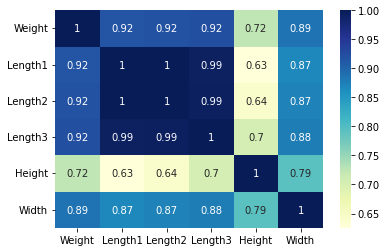

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

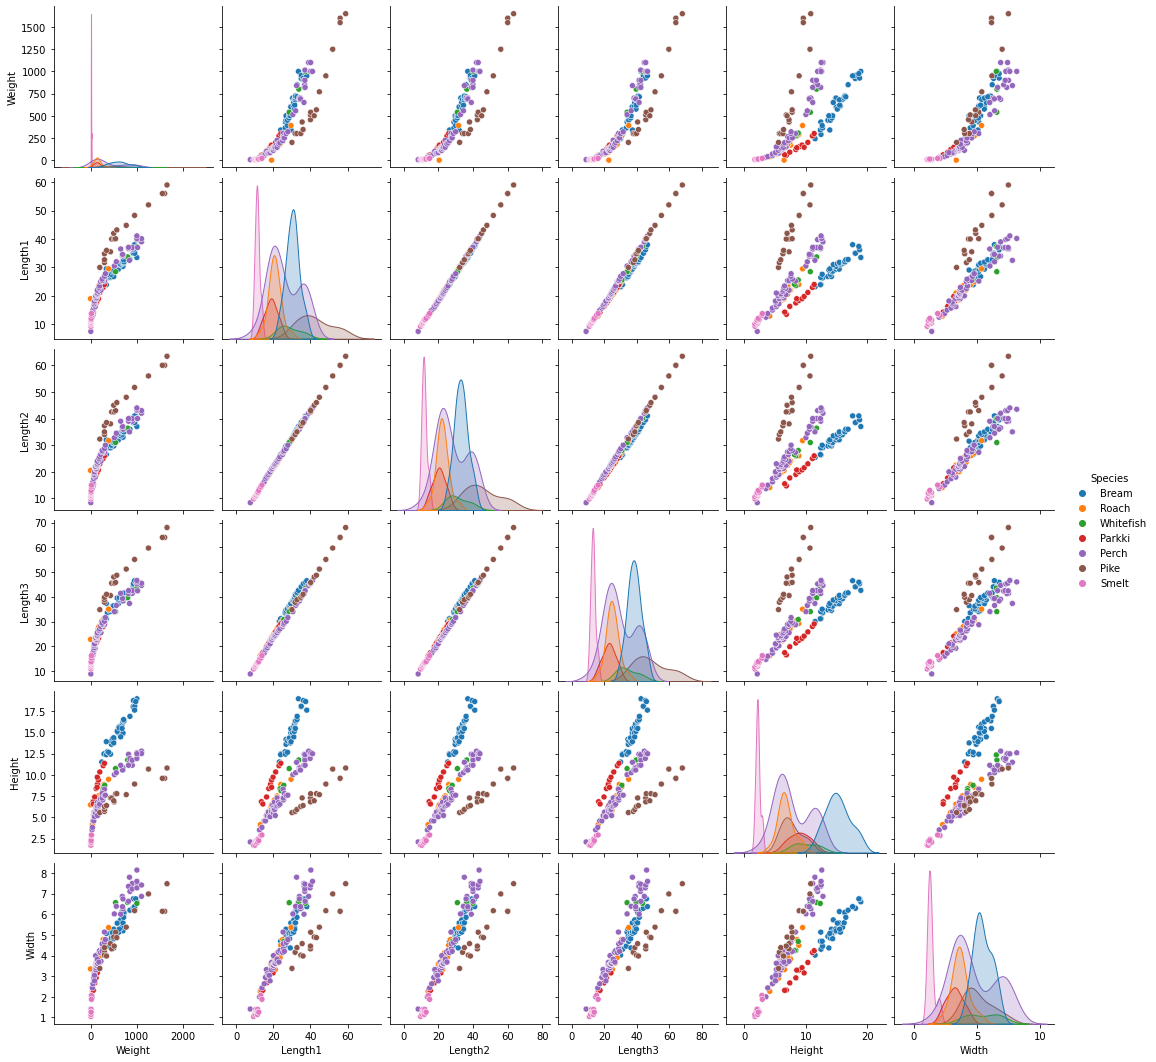

In [7]:
g = sns.pairplot(df, kind='scatter', hue='Species');

#### Outliers handling 

In [8]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [9]:
dflv = df['Length1']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [10]:
dfdia = df['Length2']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

In [11]:
dfcro = df['Length3']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: Length3, dtype: float64

In [12]:
df1 = df.drop([142,143,144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Length3,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


#### Data Spliting

In [13]:
target = df1['Weight']
df1.drop(['Weight'],axis = 1 , inplace = True)
combined = df1
combined.reset_index(inplace=True)
combined.drop(['index', 'Species'], inplace=True, axis=1)
target1=target[:116]
target2=target[116:]

In [14]:
combined.describe()

,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,25.655769,27.786538,30.571154,8.951128,4.375719
std,9.119630,9.792651,10.695359,4.324325,1.672188
min,7.500000,8.400000,8.800000,1.728400,1.047600
25%,19.000000,21.000000,23.025000,5.931675,3.369600
50%,25.000000,26.750000,29.250000,7.647800,4.243300
75%,32.125000,35.000000,39.425000,12.378550,5.424375
max,52.000000,56.000000,59.700000,18.957000,8.142000


#### Making dataset for regression perfect

In [15]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [16]:
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [17]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 5
Number of nun-numerical columns with no nan values : 0


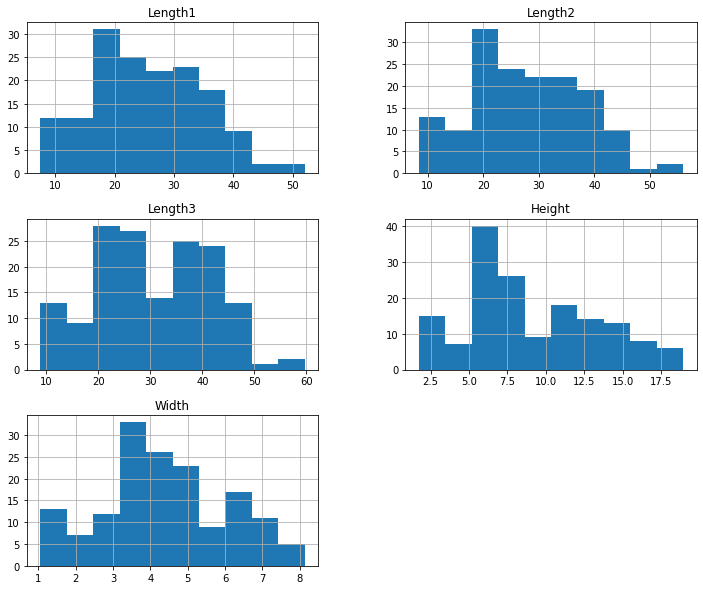

In [18]:
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

In [19]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))
combined

There were 5 columns before encoding categorical features
There are 5 columns after encoding categorical features


,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
151,11.5,12.2,13.4,2.0904,1.3936
152,11.7,12.4,13.5,2.4300,1.2690
153,12.1,13.0,13.8,2.2770,1.2558
154,13.2,14.3,15.2,2.8728,2.0672


In [20]:
def split_combined():
    global combined
    train = combined[:116]
    test = combined[116:]

    return train , test 
  
train, test = split_combined()
test

,Length1,Length2,Length3,Height,Width
116,36.5,39.0,41.4,11.1366,7.4934
117,36.5,39.0,41.4,11.1366,6.0030
118,36.6,39.0,41.3,12.4313,7.3514
119,36.9,40.0,42.3,11.9286,7.1064
120,37.0,40.0,42.5,11.7300,7.2250
121,37.0,40.0,42.4,12.3808,7.4624
122,37.1,40.0,42.5,11.1350,6.6300
123,39.0,42.0,44.6,12.8002,6.8684
124,39.8,43.0,45.2,11.9328,7.2772
125,40.1,43.0,45.5,12.5125,7.4165


### 2. Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

Length1: Vertical length in cm


In [22]:
# Length1
factor=train["Length1"]
factor1=test["Length1"]
reg.fit(factor.values.reshape(-1, 1),target1)
ypred=reg.predict(factor1.values.reshape(-1, 1))
print("Coefficient Length1 and Weight:",reg.coef_)
print("Intercept   Length1 and Weight: %0.3f" % reg.intercept_)
print("R2 score    Length1 and Weight: %.3f" % (r2_score(target2,ypred)*100))
print("MSE         Length1 and Weight: %.3f" % mean_squared_error(target2,ypred))
print("RMSE        Length1 and Weight: %.3f" % math.sqrt(mean_squared_error(target2,ypred)))
print("MAE         Length1 and Weight: %.3f" % math.sqrt(mean_absolute_error(target2,ypred)))
a=r2_score(target2,ypred)*100

Coefficient Length1 and Weight: [40.04010477]
Intercept   Length1 and Weight: -635.701
R2 score    Length1 and Weight: 53.565
MSE         Length1 and Weight: 78881.721
RMSE        Length1 and Weight: 280.859
MAE         Length1 and Weight: 15.328


Height

In [23]:

factor=train["Height"]
factor1=test["Height"]
reg.fit(factor.values.reshape(-1, 1),target1)
ypred=reg.predict(factor1.values.reshape(-1, 1))
print("Coefficient Height and Weight:",reg.coef_)
print("Intercept   Height and Weight: %0.3f" % reg.intercept_)
print("R2 score    Height and Weight: %.3f" % (r2_score(target2,ypred)*100))
print("MSE         Height and Weight: %.3f" % mean_squared_error(target2,ypred))
print("RMSE        Height and Weight: %.3f" % math.sqrt(mean_squared_error(target2,ypred)))
print("MAE         Height and Weight: %.3f" % math.sqrt(mean_absolute_error(target2,ypred)))
b=r2_score(target2,ypred)*100

Coefficient Height and Weight: [58.30486743]
Intercept   Height and Weight: -219.855
R2 score    Height and Weight: 29.536
MSE         Height and Weight: 119701.933
RMSE        Height and Weight: 345.980
MAE         Height and Weight: 16.894


Width

In [24]:
factor=train["Width"]
factor1=test["Width"]
reg.fit(factor.values.reshape(-1, 1),target1)
ypred=reg.predict(factor1.values.reshape(-1, 1))
print("Coefficient Width and Weight:",reg.coef_)
print("Intercept   Width and Weight: %0.3f" % reg.intercept_)
print("R2 score    Width and Weight: %.3f" % (r2_score(target2,ypred)*100))
print("MSE         Width and Weight: %.3f" % mean_squared_error(target2,ypred))
print("RMSE        Width and Weight: %.3f" % math.sqrt(mean_squared_error(target2,ypred)))
print("MAE         Width and Weight: %.3f" % math.sqrt(mean_absolute_error(target2,ypred)))
c=r2_score(target2,ypred)*100

Coefficient Width and Weight: [197.38345253]
Intercept   Width and Weight: -525.650
R2 score    Width and Weight: 76.911
MSE         Width and Weight: 39222.486
RMSE        Width and Weight: 198.047
MAE         Width and Weight: 12.681


### 3. Multiple Regression

Width   
Length1: Vertical length in cm    
Height

In [25]:
factor=train[["Width","Length1","Height"]]
factor1=test[["Width","Length1","Height"]]
reg.fit(factor,target1)
ypred=reg.predict(factor1)
print("Coefficient Width,Length1,Height and Weight:",reg.coef_)
print("Intercept   Width,Length1,Height and Weight: %0.3f" % reg.intercept_)
print("R2 score    Width,Length1,Height and Weight: %.3f" % (r2_score(target2,ypred)*100))
print("MSE         Width,Length1,Height and Weight: %.3f" % mean_squared_error(target2,ypred))
print("RMSE        Width,Length1,Height and Weight: %.3f" % math.sqrt(mean_squared_error(target2,ypred)))
print("MAE         Width,Length1,Height and Weight: %.3f" % math.sqrt(mean_absolute_error(target2,ypred)))
d=r2_score(target2,ypred)*100

Coefficient Width,Length1,Height and Weight: [89.40418657  9.26302657 24.35899212]
Intercept   Width,Length1,Height and Weight: -512.036
R2 score    Width,Length1,Height and Weight: 77.975
MSE         Width,Length1,Height and Weight: 37414.720
RMSE        Width,Length1,Height and Weight: 193.429
MAE         Width,Length1,Height and Weight: 12.652


Length1: Vertical length in cm    
Length2: Diagonal length in cm     
Length3: Cross length in cm

In [26]:
factor=train[["Length1","Length2","Length3"]]
factor1=test[["Length1","Length2","Length3"]]
reg.fit(factor,target1)
ypred=reg.predict(factor1)
print("Coefficient Length1,Length2,Length3 and Weight:",reg.coef_)
print("Intercept   Length1,Length2,Length3 and Weight: %0.3f" % reg.intercept_)
print("R2 score    Length1,Length2,Length3 and Weight: %.3f" % (r2_score(target2,ypred)*100))
print("MSE         Length1,Length2,Length3 and Weight: %.3f" % mean_squared_error(target2,ypred))
print("RMSE        Length1,Length2,Length3 and Weight: %.3f" % math.sqrt(mean_squared_error(target2,ypred)))
print("MAE         Length1,Length2,Length3 and Weight: %.3f" % math.sqrt(mean_absolute_error(target2,ypred)))
e=r2_score(target2,ypred)*100

Coefficient Length1,Length2,Length3 and Weight: [-53.87586206  65.01592532  18.9981309 ]
Intercept   Length1,Length2,Length3 and Weight: -631.344
R2 score    Length1,Length2,Length3 and Weight: 63.085
MSE         Length1,Length2,Length3 and Weight: 62710.911
RMSE        Length1,Length2,Length3 and Weight: 250.421
MAE         Length1,Length2,Length3 and Weight: 15.157


Width    
Height

In [27]:
factor=train[["Width","Height"]]
factor1=test[["Width","Height"]]
reg.fit(factor,target1)
ypred=reg.predict(factor1)
print("Coefficient Width Height and Weight:",reg.coef_)
print("Intercept   Width Height and Weight: %0.3f" % reg.intercept_)
print("R2 score    Width Height and Weight: %.3f" % (r2_score(target2,ypred)*100))
print("MSE         Width Height and Weight: %.3f" % mean_squared_error(target2,ypred))
print("RMSE        Width Height and Weight: %.3f" % math.sqrt(mean_squared_error(target2,ypred)))
print("MAE         Width Height and Weight: %.3f" % math.sqrt(mean_absolute_error(target2,ypred)))
f=r2_score(target2,ypred)*100

Coefficient Width Height and Weight: [125.71008481  27.51833526]
Intercept   Width Height and Weight: -475.896
R2 score    Width Height and Weight: 66.866
MSE         Width Height and Weight: 56286.734
RMSE        Width Height and Weight: 237.248
MAE         Width Height and Weight: 14.609


### 4.Random Forest Regression

In [28]:
model = RandomForestRegressor()
model.fit(train,target1)
# Get the mean absolute error on the validation data
ypred = model.predict(test)
print("R2 score    Using Random Forest Regression for Weight: %.3f" % (r2_score(target2,ypred)*100))
print("MSE         Using Random Forest Regression for Weight: %.3f" % mean_squared_error(target2,ypred))
print("RMSE        Using Random Forest Regression for Weight: %.3f" % math.sqrt(mean_squared_error(target2,ypred)))
print("MAE         Using Random Forest Regression for Weight: %.3f" % math.sqrt(mean_absolute_error(target2,ypred)))
g=r2_score(target2,ypred)*100

R2 score    Using Random Forest Regression for Weight: 80.996
MSE         Using Random Forest Regression for Weight: 32283.140
RMSE        Using Random Forest Regression for Weight: 179.675
MAE         Using Random Forest Regression for Weight: 11.372


### 5. XGB Regression

In [29]:
XGBModel = XGBRegressor()
XGBModel.fit(train,target1, verbose=False)

# Get the mean absolute error on the validation data :
ypred = XGBModel.predict(test)
print("R2 score    Using XGBRegressor for Weight: %.3f" % (r2_score(target2,ypred)*100))
print("MSE         Using XGBRegressor for Weight: %.3f" % mean_squared_error(target2,ypred))
print("RMSE        Using XGBRegressor for Weight: %.3f" % math.sqrt(mean_squared_error(target2,ypred)))
print("MAE         Using XGBRegressor for Weight: %.3f" % math.sqrt(mean_absolute_error(target2,ypred)))
h=r2_score(target2,ypred)*100

R2 score    Using XGBRegressor for Weight: 92.750
MSE         Using XGBRegressor for Weight: 12316.140
RMSE        Using XGBRegressor for Weight: 110.978
MAE         Using XGBRegressor for Weight: 8.965


In [30]:
import pickle
pickle_out = open("estimation.pkl", "wb")
pickle.dump(XGBModel, pickle_out)
pickle_out.close()

### 6. DNN

In [31]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,633
Trainable params: 165,633
Non-trainable params: 0
_________________________________________________________________


2022-03-16 07:25:05.214653: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [33]:
history=NN_model.fit(train, target1, epochs=800, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


2022-03-16 07:25:05.758109: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/800
3/3 [==============================] - 1s 121ms/step - loss: 340.7296 - mean_absolute_error: 340.7296 - val_loss: 347.7900 - val_mean_absolute_error: 347.7900

Epoch 00001: val_loss improved from inf to 347.79001, saving model to Weights-001--347.79001.hdf5
Epoch 2/800
3/3 [==============================] - 0s 22ms/step - loss: 338.4211 - mean_absolute_error: 338.4211 - val_loss: 343.9403 - val_mean_absolute_error: 343.9403

Epoch 00002: val_loss improved from 347.79001 to 343.94034, saving model to Weights-002--343.94034.hdf5
Epoch 3/800
3/3 [==============================] - 0s 22ms/step - loss: 333.7963 - mean_absolute_error: 333.7963 - val_loss: 336.1901 - val_mean_absolute_error: 336.1901

Epoch 00003: val_loss improved from 343.94034 to 336.19009, saving model to Weights-003--336.19009.hdf5
Epoch 4/800
3/3 [==============================] - 0s 22ms/step - loss: 324.8842 - mean_absolute_error: 324.8842 - val_loss: 321.3445 - val_mean_absolute_error: 321.3445

Epoch 000

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


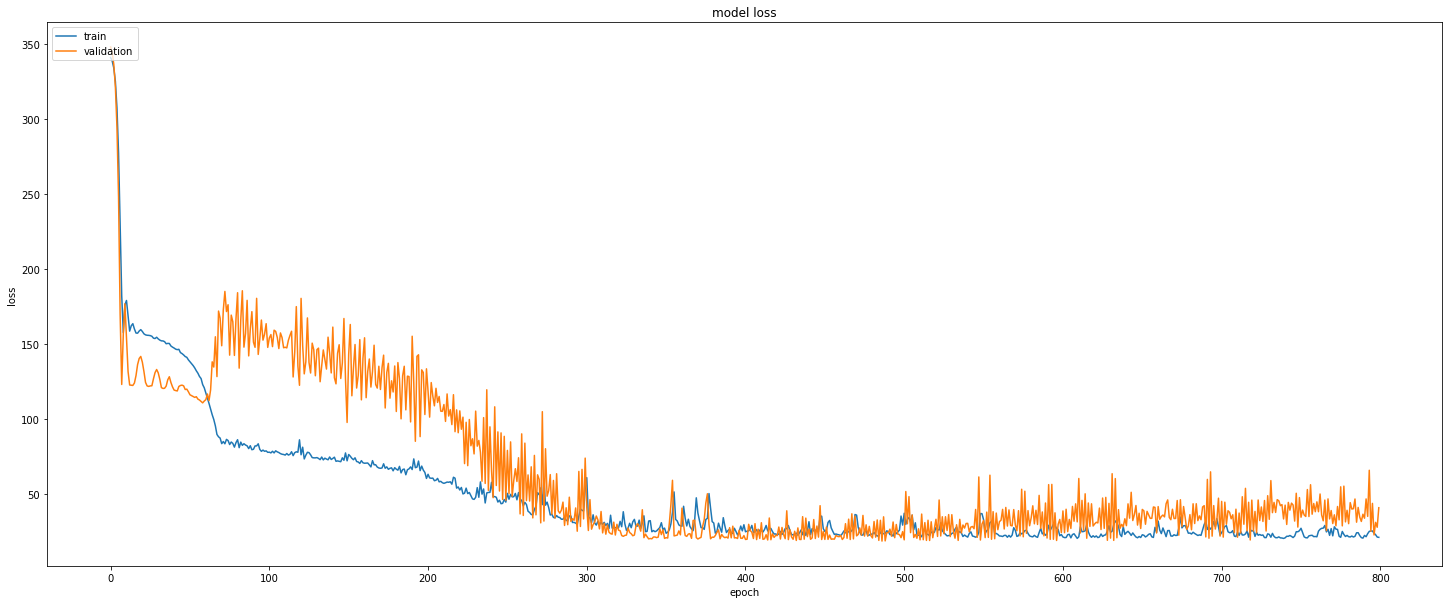

In [34]:
print(history.history.keys())
plt.figure(figsize=(25, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


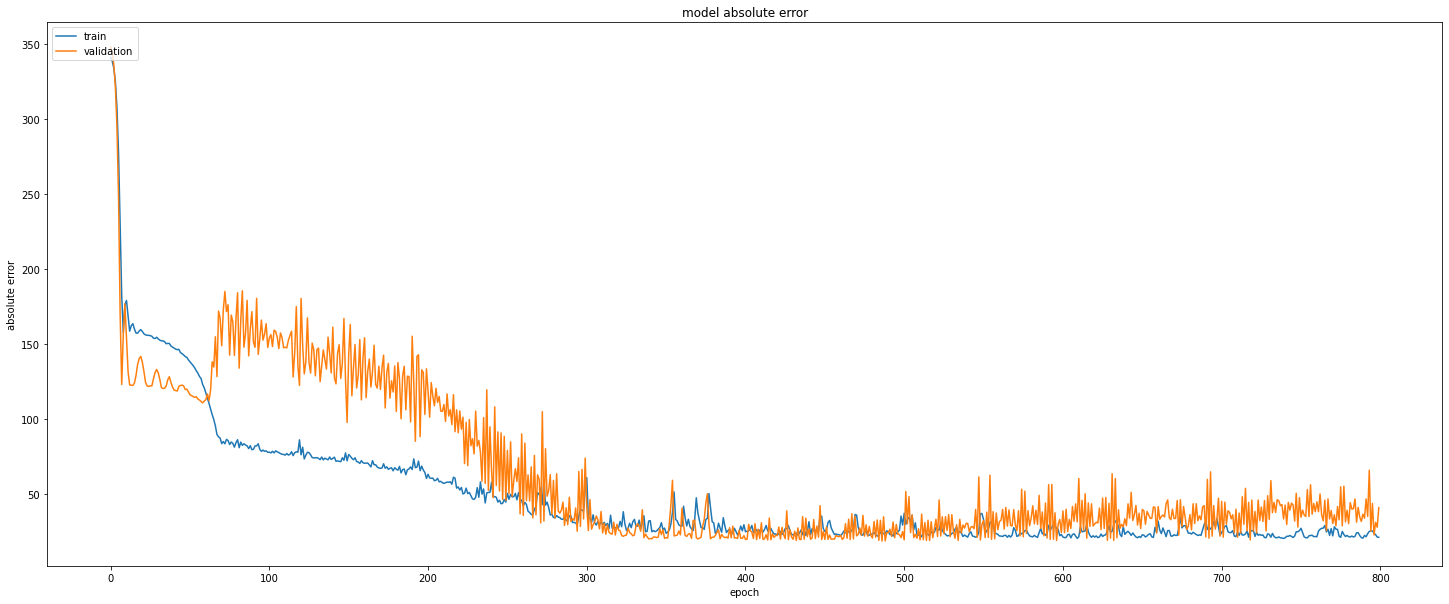

In [35]:
print(history.history.keys())
plt.figure(figsize=(25, 10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model absolute error')

plt.ylabel('absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [36]:
wights_file = './Weights-487--18.80881.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [37]:
ypred = NN_model.predict(test)
print("R2 score    Using DNN for Weight: %.3f" % (r2_score(target2,ypred)*100))
print("MSE         Using DNN for Weight: %.3f" % mean_squared_error(target2,ypred))
print("RMSE        Using DNN for Weight: %.3f" % math.sqrt(mean_squared_error(target2,ypred)))
print("MAE         Using DNN for Weight: %.3f" % math.sqrt(mean_absolute_error(target2,ypred)))
i=r2_score(target2,ypred)*100

R2 score    Using DNN for Weight: 95.809
MSE         Using DNN for Weight: 7119.818
RMSE        Using DNN for Weight: 84.379
MAE         Using DNN for Weight: 7.675


### 7. Comparison between all models

> **We are taking R-square for selecting best model**

In [38]:
print("R2 score Length1 and Weight:                       %.3f" % (a))
print("R2 score Height and Weight:                        %.3f" % (b))
print("R2 score Width and Weight:                         %.3f" % (c))
print("R2 score Length1,Length2,Length3 and Weight:       %.3f" % (d))
print("R2 score Width,Length1,Height and Weight:          %.3f" % (e))
print("R2 score Width,Height and Weight:                  %.3f" % (f))
print("R2 score Using Random Forest Regression for Weight:%.3f" % (g))
print("R2 score Using XGBRegressor for Weight:            %.3f" % (h))
print("R2 score Using DNN for Weight:                     %.3f" % (i))
      

R2 score Length1 and Weight:                       53.565
R2 score Height and Weight:                        29.536
R2 score Width and Weight:                         76.911
R2 score Length1,Length2,Length3 and Weight:       77.975
R2 score Width,Length1,Height and Weight:          63.085
R2 score Width,Height and Weight:                  66.866
R2 score Using Random Forest Regression for Weight:80.996
R2 score Using XGBRegressor for Weight:            92.750
R2 score Using DNN for Weight:                     95.809


### 8. Visualization and results of best model

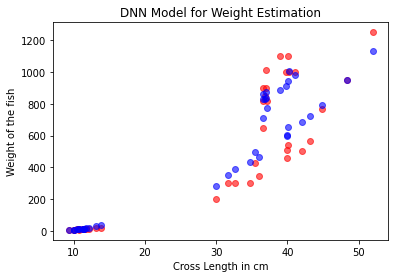

In [39]:
plt.scatter(test['Length1'], target2, color='red', alpha=0.6)
plt.scatter(test['Length1'], ypred, color='blue', alpha=0.6)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('DNN Model for Weight Estimation');

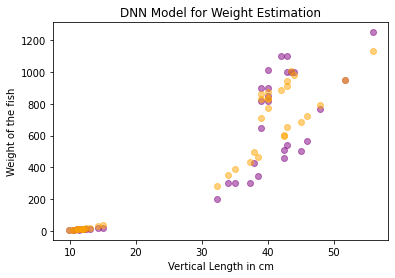

In [40]:
plt.scatter(test['Length2'], target2, color='purple', alpha=0.5)
plt.scatter(test['Length2'], ypred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('DNN Model for Weight Estimation');

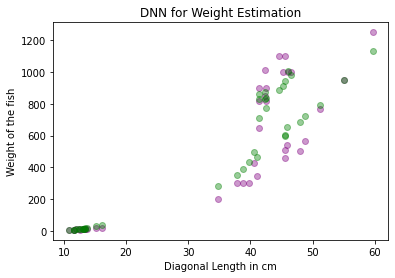

In [41]:
plt.scatter(test['Length3'], target2, color='purple', alpha=0.4)
plt.scatter(test['Length3'], ypred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('DNN for Weight Estimation');

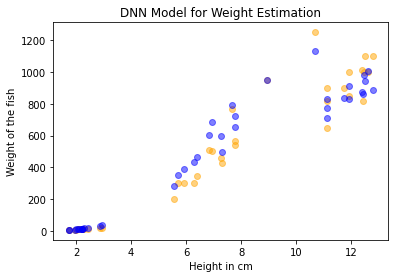

In [42]:
plt.scatter(test['Height'], target2, color='orange', alpha=0.5)
plt.scatter(test['Height'], ypred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('DNN Model for Weight Estimation');

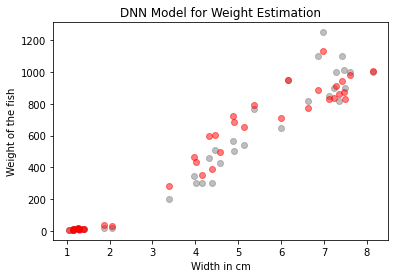

In [43]:
plt.scatter(test['Width'], target2, color='gray', alpha=0.5)
plt.scatter(test['Width'], ypred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('DNN Model for Weight Estimation');

### Conclusion

From above code we can see that DNN is best which give accuracy about 95.97% and we have done 600 epoches .

## Made By Shivam Saxena

